# Mean-Shifting in Kernel Density Estimation for mode-seeking.

## 1. Annealed Mean-Shift

In plain ***Kernel Density Estimation*** (KDE), given a set of sampled points $\left\lbrace x_i\right\rbrace_{i=1}^n\subseteq\mathbb{R}^d$ one tries to build a distribution that could resemble the generator of the sample via a normalized (here, averaged) sum of *little* basis functions. Those are called the kernel functions, from which one of the most used would be the ***gaussian kernel***, for efficiency purposes.

The estimation of the generating ***probability density function*** (pdf) is given by

$$\hat{f}_K\left(x\right)\ =\ \frac{1}{n}\sum_{i=1}^nK_H\left(x-x_i\right)$$

where

$$K_H\ =\ |H|^{-\frac{1}{2}}K\left(H^{-\frac{1}{2}}x\right)$$

In some applications it is interesting to determine the value of the step matrix $H$, since it provides an optimal way of converging to a distribution minimizing ***asymptotic mean integrated squared error*** (AMISE) with respect to the real distribution. However, this approach would lead us to know the whole distribution, distracting us from the real purpose of this work. Plus, its complexity is critically dependant on de dimensionality of the problem we are dealing with. For that reason, we focus on tackling the issue of finding the mode of the estimated distribution, via a gradient-ascent-like reasoning.

First, for simplicity we can give a convenient shape to $H=h^2I_d$, so that the kernels used are ***isotropic*** (i. e., has radial symmetry). Secondly, we adopt another notation for the kernel, for reasons that will soon become apparent:

**Definition 1.** Let $K:\ \Omega\subseteq\mathbb{R}^d\longrightarrow\mathbb{R}$ and $k:\ [0,\infty)\longrightarrow\mathbb{R}$ be functions such that the following hold:

- $$K(x)=k(\|x\|^2)$$
- $k$ is nonnegative
- $k$ is nonincreasing
- $k$ is piecewise continuous and is integrable

where $\|\cdot\|$ stands for the Euclidean norm. Then $K$ is called a kernel, and $k$ is called its profile.

For all that concerns this work, the gaussian kernel can be thus represented by its profile function, $k(x)=e^{-x}$. All together, leads to the expression

$$\hat{f}_k\left(x\right)\ =\ \frac{c_k}{nh^d}\sum_{i=1}^nk\left(\left\|\frac{x-x_i}{h}\right\|^2\right)$$

where $c_k$ is a normalization constant. Since the ensemble of smooth functions conforms a smooth function, seeking for modes is equivalent to finding the estimate's greatest critical value. By deriving $\hat{f}_k$ explicitly, we get the following results:

$$
\begin{matrix}
\nabla\hat{f}_k(x) & = & \frac{c_k}{nh^d}\displaystyle\sum_{i=1}^n\nabla\left[k\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\right] \\
 & = &  \frac{c_k}{nh^d}\displaystyle\sum_{i=1}^nk'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\nabla\left[\left\|\frac{x-x_i}{h}\right\|^2\right]\\
 & = &  \frac{c_k}{nh^d}\displaystyle\sum_{i=1}^nk'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\frac{2}{h^2}(x-x_i)\\
 & = &  \frac{2}{h^2}\frac{c_k}{nh^d}\displaystyle\left[x\sum_{i=1}^nk'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)-\sum_{i=1}^nx_ik'\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\right]\\
 & = & \frac{2}{h^2}\frac{c_k}{nh^d}\displaystyle\left[\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)-x\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\right]\\
 & = & \frac{2}{h^2}\frac{c_k}{nh^d}\displaystyle\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)\left[\frac{\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}{\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}-x\right]\\
 & = & \frac{2c_k}{h^2c_g}\hat{f}_g(x)\cdot m_g(x)\\
 & = & 0
\end{matrix} 
$$

with $g(t)=-k'(t)$ and

$$
\begin{matrix}
 \hat{f}_g(x) & = & \frac{c_g}{nh^d}\displaystyle\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right) & \\
 m_g(x) & = & \frac{\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}{\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}-x & \qquad (\star)
\end{matrix} 
$$

where $c_g$ is again a normalization constant. In literature, $g$ is again named as a ***profile*** function of some (a priori unkonwn) kernel, while $k$ is called its ***shadow***. The name of the method comes from the expression $m_g(x)$, which is a measure of the centroid (otherwise known simply as average or mean value) of the samples, displaced by the value $x$. Hence, ***Mean-Shift*** (MS).

It is somewhat evident that this condition imposes that $m_g(x)=0$ when evaluated at the mode. Since approximating this value will be the target, a notion similar to a gradient-ascent method is used in this algorithm, by selecting values $x$ and redefining it as

$$x\ \longleftarrow\ \frac{\sum_{i=1}^nx_ig\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}{\sum_{i=1}^ng\left(\left\|\frac{x-x_i}{h}\right\|^2\right)}$$

The method presented here pretends to enhance the performance of the above procedure, by choosing the parameter $h$ as a sequence of strictly decreasing values until reaching a last value, which in principle is the halting spot. That means choosing finite values $h_0>h_1>\ldots>h_M$ such that $h_0>>h_M$ and the procedure described has some kind of convergence.

As mentioned, the kernel we use is the gaussian, which has the negative exponential as its profile. Then it is straightforward the fact that profile and shadow functions are the same ($g(x)=-k'(x)=k(x)$). In fact, the gaussian kernel and its truncated version are the only ones satisfying this condition, and allows for even more simplification. From the definition of the kernel and the profile, and the fact that $|H|=h^{2d}$, we have that

$$
\begin{matrix}
 & K(x) & = & k(\|x\|) & = & e^{-\|x\|}\\
\Longrightarrow & |H|^{-\frac{1}{2}}K\left(H^{-\frac{1}{2}}x\right) & = & \frac{1}{h^d}k\left(\left\|\frac{x}{h}\right\|^2\right) & = & \frac{1}{h^d}e^{-\frac{\|x\|^2}{h^2}}\\
\Longrightarrow & \hat{f}_k(x) & = & \hat{f}_g(x) & = & \frac{c_{k|g}}{nh^d}\displaystyle\sum_{i=1} e^{-\frac{\|x-x_i\|^2}{h^2}}\\
\Longrightarrow & c_k & = & c_g & = & \frac{1}{\sqrt{\pi}^d} 
\end{matrix} 
$$


## 2. Fast Mean-Shift

Since the later method is highly dependent on the choice of the steps $h$, yet simple, it is not really clear how to make that choice. One could explore different sets of sequences until obtaining stable results, always being aware of the trade-off between speed of convergence and the amount of steps to consider (i. e., the smaller the step, the faster and less precise the final value will be; the larger the step, with more precision the mode is achieved with more steps).

This second approach (known as ***Adaptive Over-Relaxed MS***) uses the same results as before, but tries to enhance the performance of the method, while not explicitly choosing the step values $h$ but by providing an adaptive step schema, iterating over the $x$ reevaluation until a tolerance is achieved. 

While the derivation of this method could be a little tricky, it is well justified since our problem is set in such a way that it requires for bounded optimization methods (which imply the use of bound cost functions), and since the fact that $m_g(x)\propto\frac{\nabla\hat{f}_k(x)}{\hat{f}_g(x)}$ (which means it is, in fact, a gradient ascent). The steps would be read as

$$x_{k+1}=x_k+\beta_k\left[\arg\max\rho(x,x_k)-x_k\right]$$

where $\beta_k$ is known as a learning rate (the greater the value, the more the steps should accelerate to an optimal value) and $\rho(\cdot,\cdot)$ is a bound cost function. Since the criteria for collapsing the iterated values to a desired maximum is given by updating $x$ to the mean shifted value $m_g(x)$, this is what we will use as the cost function, while it has been shown that convergence can be assured if the value of $\beta_k$ is set to $1$ at the beginning and is then adapted so that it can grow at times or set back to $1$ if we move away from the optimal value $x$. The iteration is continued up to meeting a tolerance, which for simplicity can be calculated as the ratio

$$\varepsilon=\frac{\hat{f}_g(x_{k+1})-\hat{f}_g(x_k)}{\hat{f}_g(x_k)}$$

According to the work that gives rise to this implementation, the algorithm is as follows

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
Begin iteration with <font color = "red">$x_1$</font>, <font color = "blue">$\beta$</font>$=1$, <font color = "green">$\alpha$</font>$>0$<br>
Iterate until convergence is met (e. g., <font color = "orange">$\varepsilon<0.001$</font>)<br>   
&nbsp;&nbsp;&nbsp;&nbsp; Calculate <font color = "brown">$\tilde{x}$</font> with $(\star)$ applied to <font color = "red">$x_k$</font><br>
&nbsp;&nbsp;&nbsp;&nbsp; Calculate $\rho_k=$<font color = "brown">$\tilde{x}$</font>$-$<font color = "red">$x_k$</font><br>
&nbsp;&nbsp;&nbsp;&nbsp; Set <font color = "red">$x_{k+1}$</font>$=$<font color = "red">$x_k$</font>+<font color = "blue">$\beta$</font>$\rho_k$<br>
&nbsp;&nbsp;&nbsp;&nbsp; If $\hat{f}_g($<font color = "red">$x_{k+1}$</font>$)>\hat{f}_g($<font color = "red">$x_k$</font>$)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accept <font color = "red">$x_{k+1}$</font> and <font color = "blue">$\beta$</font>$=$<font color = "green">$\alpha$</font>$\cdot$<font color = "blue">$\beta$</font><br>
&nbsp;&nbsp;&nbsp;&nbsp; Else<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Reject <font color = "red">$x_{k+1}$</font> and set <font color = "red">$x_{k+1}$</font>$=$<font color = "brown">$\tilde{x}$</font> and <font color = "blue">$\beta$</font>$=1$
</div>


## 3. Implementation of functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time


In [279]:
def simpnorm(x, mu, sig):
    """
    Returns 1D gaussian pdf
    
    Parameters
    ----------
    x     : (array) 1-dimensional value at which to evaluate
    mu    : (float) mean of the distribution
    sigma : (float) standard deviation of the distribution
    """
    ex = - (((x - mu) / sig) ** 2) / 2
    norm = (1 / np.sqrt(2 * np.pi)) / sig
    distr = norm * np.exp(ex)
    return distr

def multnorm(xv, yv, mu, cov):
    """
    Returns 2D multivariate gaussian pdf
    
    Parameters
    ----------
    xv, yv : (matrix) 2-dimensional grid at which to evaluate
    mu     : (array) mean vector of the distribution
    cov    : (matrix) covariance matrix of the distribution
    """
    distr = np.zeros(xv.shape)
    for i, x in enumerate(xv):
        for j, y in enumerate(yv):
            X = np.array([xv[i][j], yv[i][j]])
            covinv = np.linalg.inv(cov)
            ex = -(np.dot(X - mu, np.dot(covinv, X - mu))) / 2
            den = np.sqrt(np.abs(np.linalg.det(covinv))) / (2 * np.pi)
            distr[i][j] = den * np.exp(ex)
    return distr


In [347]:
def shadow(x):
    """
    Returns shadow of the selected (gaussian) profile
    
    Parameters
    ----------
    x   : (array) 1-dimensional value at which to evaluate
    """
    e = np.exp(-x)
    return e

def profile(x):
    """
    Returns profile of the selected (gaussian) kernel
    
    Parameters
    ----------
    x    : (array) 1-dimensional value at which to evaluate
    """
    e = np.exp(-x)
    return e

def pdfest(x, xsam, h):
    """
    Returns estimation of pdf given the selected (gaussian) profile
    
    Parameters
    ----------
    x      : (array) d-dimensional value at which to evaluate
    xsam   : (array) length n array of d-dimensional samples
    h      : (float) 1-dimensional step
    """
    
    # First we need to identify if the data is 1-dimensional or higher-dimensional
    if len(xsam.shape) == 1:
        n = xsam.shape[0]                                   # Number of samples
        d = 1                                               # Dimension
        arg = (np.abs(x - xsam) / h) ** 2                   # Argument for the profile
        
    else:
        n, d = xsam.shape                                   # Number of samples, Dimension
        arg = (np.linalg.norm(x - xsam, axis=1) / h) ** 2   # Argument for the profile
    
    cg = 1 / (np.sqrt(np.pi)) ** d                          # Normalization constant
    norm = cg / (n * (h ** d))                              # Normalization for the ensemble
    est = np.sum(profile(arg))                              # Sum of evaluated profiles
    fest = norm * est                                       # Normalized sum of profiles
    
    return fest

def mshift(x, xsam, h):
    """
    Returns weighted mean and estimated pdf given the selected (gaussian) profile
    
    Parameters
    ----------
    x      : (array) d-dimensional value at which to evaluate
    xsam   : (array) length n array of d-dimensional samples
    h      : (float) 1-dimensional step
    """
    # First we need to identify if the data is 1-dimensional or higher-dimensional
    if len(xsam.shape) == 1:
        n = xsam.shape[0]                                   # Number of samples
        d = 1                                               # Dimension
        arg = (np.abs(x - xsam) / h) ** 2                   # Argument for the profile
        prof = profile(arg)                                 # Evaluated profile
        sum1 = np.sum(xsam.T * prof)                        # Weighted sum of profiles
        
    else:
        n, d = xsam.shape                                   # Number of samples, Dimension
        arg = (np.linalg.norm(x - xsam, axis=1) / h) ** 2   # Argument for the profile
        prof = profile(arg)                                 # Evaluated profile
        sum1 = np.sum(xsam.T * prof, axis=1)                # Weighted sum of profiles
    
    cg = 1 / (np.sqrt(np.pi)) ** d                          # Normalization constant
    norm = cg / (n * h ** d)                                # Normalization for the ensemble
    sum2 = np.sum(prof)                                     # Sum of evaluated profiles
    shift = (sum1 / sum2)                                   # Weighted mean of evaluated profiles
    fest = norm * sum2                                      # Normalized sum of profiles
    
    return shift, fest

def annealedms(x0, xsam, hm):
    """
    Returns estimated mode, pdf evaluated at the mode and sequence of points from iteration
    executing annealed mean shift
    
    Parameters
    ----------
    x0     : (array) initial d-dimensional value at which to evaluate
    xsam   : (array) length n array of d-dimensional samples
    hm     : (array) length n array of 1-dimensional steps
    """
    xnew = x0
    xs = [xnew]                                             # Initialization of algorithm sequence
    for i in range(len(hm)):                                # Perform shifting for each value in hm
        xnew, pdfestnew = mshift(xnew, xsam, hm[i])
        xs.append(xnew)
    xs = np.asarray(xs)
    return xnew, pdfestnew, xs

def fastms(x0, xsam, h, alpha=1.25, tol=0.001):
    """
    Returns estimated mode, pdf evaluated at the mode and sequence of points from iteration
    executing fast mean shift
    
    Parameters
    ----------
    x0     : (array) initial d-dimensional value at which to evaluate
    xsam   : (array) length n array of d-dimensional samples
    h      : (float) 1-dimensional step
    alpha  : (float) acceleration to learning-rate beta when it is possible (default 1.25)
    tol    : (float) error tolerance when finding the optimal value (defaut 0.001)
    """
    beta = 1
    eps = 1
    xk = x0
    xs = [xk]                                               # Initialization of algorithm sequence
    festk = pdfest(xk, xsam, h)
    while eps >= tol:                                       # Perform enhanced MS until reaching tolerated error
        xktilda, festktilda = mshift(xk, xsam, h)
        mg = xktilda - xk                                   # Bound cost function
        xknext = xk + beta * mg                             # Possible next step
        festnext = pdfest(xknext, xsam, h)
        cond = 1 * (festnext > festk)                       # Acceptance/Rejection condition
        if cond == 1:
            xk = xknext                                     # Accept
            eps = (festnext - festk) / festk                # Tolerance criteria
            festk = festnext
            beta *= alpha                                   # Accelerate learning-rate
        else:
            xk = xktilda                                    # Reject
            beta = 1                                        # Reset learning-rate to 1
        xs.append(xk)
    xs = np.asarray(xs)
    fest = pdfest(xk, xsam, h)
    return xk, fest, xs


## 4. 1-D examples

### 4.1 Samples drawn from a simple normal distribution

In [367]:
mu1 = 0.5
sigma1 = 0.8
size1 = 10000

xsam1 = np.random.normal(mu1, sigma1, size1)
ysam1 = simpnorm(xsam1, mu1, sigma1)

In [368]:
xin1 = np.random.uniform(-4, 4)

m1 = np.linspace(0, 2, 10)
hm1 = 6 + np.exp(-m1)

In [369]:
ts = time.time()
xams1, fams1, xsams1 = annealedms(xin1, xsam1, hm1)
tf = time.time()

comptime = np.round(tf - ts, 3)
print('Annealed MS computation time: ' + str(comptime) + 's')

ts = time.time()
xfms1, ffms1, xsfms1 = fastms(xin1, xsam1, hm1[0])
tf = time.time()

comptime = np.round(tf - ts, 3)
print('Fast MS computation time: ' + str(comptime) + 's')

Annealed MS computation time: 0.017s
Fast MS computation time: 0.003s


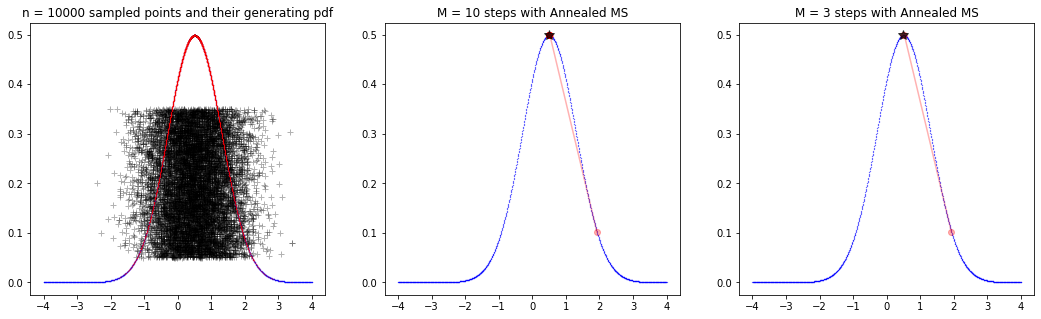

In [370]:
x = np.linspace(-4, 4, 1000)
y1 = simpnorm(x, mu1, sigma1)
y2 = simpnorm(xsams1, mu1, sigma1)
y3 = simpnorm(xsfms1, mu1, sigma1)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(xsam1, 0.05 + 0.3 * np.random.random(xsam1.shape[0]), '+k', alpha=0.3, zorder=1)
ax[0].plot(x, y1, 'b.', ms=0.5, zorder=2)
ax[0].plot(xsam1, ysam1, 'r.', ms=0.1, zorder=3)
ax[0].set_title('n = ' + str(size1) + ' sampled points and their generating pdf')

ax[1].plot(x, y1, 'b.', ms=0.5)
ax[1].plot(xsams1, y2, 'r-', alpha=0.3, ms=0.5)
ax[1].plot(xsams1, y2, 'ro', alpha=0.3)
ax[1].plot(xsams1[-1], y2[-1], 'k*', alpha=0.7, ms=10)
ax[1].set_title('M = ' + str(len(hm1)) + ' steps with Annealed MS')

ax[2].plot(x, y1, 'b.', ms=0.5)
ax[2].plot(xsfms1, y3, 'r-', alpha=0.3, ms=0.5)
ax[2].plot(xsfms1, y3, 'ro', alpha=0.3)
ax[2].plot(xsfms1[-1], y3[-1], 'k*', alpha=0.7, ms=10)
ax[2].set_title('M = ' + str(len(xsfms1)) + ' steps with Annealed MS')

plt.show()

### 4.2 Samples drawn from combined normal distributions

In [436]:
mu21 = 1
sigma21 = 0.8
size21 = 3000

mu22 = 6
sigma22 = 2
size22 = 5000

mu23 = -4
sigma23 = 1.2
size23 = 2000

xsam2 = np.append(np.random.normal(mu21, sigma21, size21), np.append(np.random.normal(mu22, sigma22, size22), np.random.normal(mu23, sigma23, size23)))
ysam2 = 0.3 * simpnorm(xsam2,mu21, sigma21) + 0.5 * simpnorm(xsam2, mu22, sigma22) + 0.2 * simpnorm(xsam2, mu23, sigma23)

In [437]:
xin2 = np.random.uniform(-10, 15)

m2 = np.linspace(0, 2, 20)
hm2 = 1000 + np.exp(-m2)

In [438]:
ts = time.time()
xams2, fams2, xsams2 = annealedms(xin2, xsam2, hm2)
tf = time.time()

comptime = np.round(tf - ts, 3)
print('Annealed MS computation time: ' + str(comptime) + 's')

ts = time.time()
xfms2, ffms2, xsfms2 = fastms(xin2, xsam2, hm2[0], tol=0.001)
tf = time.time()

comptime = np.round(tf - ts, 3)
print('Fast MS computation time: ' + str(comptime) + 's')

Annealed MS computation time: 0.013s
Fast MS computation time: 0.002s


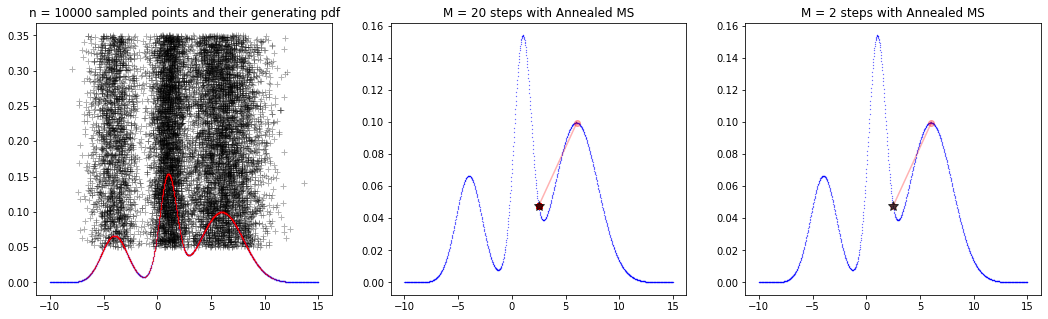

In [439]:
x = np.linspace(-10,15,1000)
y1 = 0.3 * simpnorm(x,mu21, sigma21) + 0.5 * simpnorm(x, mu22, sigma22) + 0.2 * simpnorm(x, mu23, sigma23)
y2 = 0.3 * simpnorm(xsams2,mu21, sigma21) + 0.5 * simpnorm(xsams2, mu22, sigma22) + 0.2 * simpnorm(xsams2, mu23, sigma23)
y3 = 0.3 * simpnorm(xsfms2,mu21, sigma21) + 0.5 * simpnorm(xsfms2, mu22, sigma22) + 0.2 * simpnorm(xsfms2, mu23, sigma23)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(xsam2, 0.05 + 0.3 * np.random.random(xsam2.shape[0]), '+k', alpha=0.3, zorder=1)
ax[0].plot(x, y1, 'b.', ms=0.5, zorder=2)
ax[0].plot(xsam2, ysam2, 'r.', ms=0.1, zorder=3)
ax[0].set_title('n = ' + str(size1) + ' sampled points and their generating pdf')

ax[1].plot(x, y1, 'b.', ms=0.5)
ax[1].plot(xsams2, y2, 'r-', alpha=0.3, ms=0.5)
ax[1].plot(xsams2, y2, 'ro', alpha=0.3)
ax[1].plot(xsams2[-1], y2[-1], 'k*', alpha=0.7, ms=10)
ax[1].set_title('M = ' + str(len(hm2)) + ' steps with Annealed MS')

ax[2].plot(x, y1, 'b.', ms=0.5)
ax[2].plot(xsfms2, y3, 'r-', alpha=0.3, ms=0.5)
ax[2].plot(xsfms2, y3, 'ro', alpha=0.3)
ax[2].plot(xsfms2[-1], y3[-1], 'k*', alpha=0.7, ms=10)
ax[2].set_title('M = ' + str(len(xsfms2)) + ' steps with Annealed MS')

plt.show()

## 5. 2-D examples

### 5.1 Samples drawn from a simple multivariate normal distribution

In [440]:
np.random.seed(1)

mu = np.asarray([0., 1.])
cov = np.asarray([[1, 0.4], [0.4, 0.25]])
size = 10000

In [441]:
Nx = 85
Ny = 85

x = np.linspace(-4, 4 ,Nx)
y = np.linspace(-4, 5, Ny)
xv, yv = np.meshgrid(x, y)

xsam = np.random.multivariate_normal(mu, cov, size)
ev = multnorm(xv, yv, mu, cov)


In [443]:
m2 = np.linspace(0, 2, 20)
hm2 = 6 + np.exp(-m1)

In [445]:
x0 = np.array([np.random.uniform(-4, 4), np.random.uniform(-4, 5)])

ts = time.time()
xf2, pf2, xs2 = annealedms(x0, xsam, hm2)
print(time.time() - ts)

0.02699565887451172


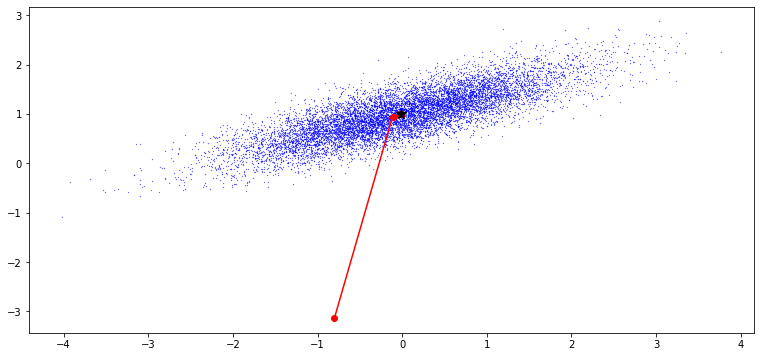

In [446]:
fig = plt.figure(figsize=(13,6))

fig, ax = plt.subplots(1, 2, figsize=(13,6))

ax[0].contourf(x, y, ev, cmap='viridis')
ax[0].set_title('Generating pdf')

ax[1].plot(xsam.T[0], xsam.T[1], 'k.', ms=1, zorder=1)
ax[1].contour(x, y, ev, alpha=0.6, cmap='viridis', zorder=2)
ax[1].set_xlim([x[0], x[-1]])
ax[1].set_ylim([y[0], y[-1]])
ax[1].set_title('n = ' + str(size) + ' samples')

plt.show()


plt.plot(xsam.T[0], xsam.T[1], 'b.', ms=0.5, zorder=1)
plt.plot(xs2.T[0], xs2.T[1], 'r-', ms=0.5, zorder=2)
plt.plot(xs2.T[0], xs2.T[1], 'ro', zorder=3)
plt.plot(xs2[-1][0], xs2[-1][1], 'k*', ms=10, zorder=4)

plt.show()

In [331]:
xf2, pf2

(array([-0.01852421,  0.99242691]), 0.008185336632476555)